In [1]:
from citipy import citipy
import pyowm

import numpy as np 

In [2]:
# initialize lists for weather data
temperature = list()
humidity = list()
cloudiness = list()
wind_speed = list() 
latitudes = list()

cities = list()
countries = list()

In [3]:
# randomly select 500 cities
random_cities = set() 

# use weather api to get weather info for each city
owm = pyowm.OWM('e96a85a5c915aafb2145b779faece273')

while (len(random_cities) != 500):
    latitude = np.random.uniform(low=-90, high=90)
    longitude = np.random.uniform(low=-180, high=180)
    city = citipy.nearest_city(latitude, longitude)
    try: 
        lookup_string = city.city_name + ',' + city.country_code.upper()
        observation = owm.weather_at_place(lookup_string)
        w = observation.get_weather()
    
        temperature.append(w.get_temperature('fahrenheit').get('temp'))
        wind_speed.append(w.get_wind().get('speed'))
        humidity.append(w.get_humidity())
        cloudiness.append(w.get_clouds())
        latitudes.append(latitude)
        cities.append(city.city_name)
        countries.append(city.country_code)
        
        random_cities.add(city)
        print(city.city_name, city.country_code)
    except:
        continue


cabo san lucas mx
bluff nz
esperance au
punta arenas cl
shanghai cn
kamaishi jp
yellowknife ca
atuona pf
bluff nz
broome au
nambiyur in
kaseda jp
punta arenas cl
pisco pe
kapaa us
lagoa pt
east london za
lagoa pt
abaete br
vaini to
georgetown sh
ushuaia ar
port elizabeth za
tiksi ru
pangoa pe
talara pe
boyuibe bo
ashland us
port alfred za
mamallapuram in
clyde river ca
mar del plata ar
rikitea pf
victoria sc
tiksi ru
port alfred za
busselton au
punta arenas cl
butaritari ki
bluff nz
albany au
bathsheba bb
kiunga pg
rikitea pf
bethel us
lakes entrance au
butaritari ki
miramar mx
new norfolk au
vaini to
walvis bay na
punta arenas cl
aztec us
port elizabeth za
kaitangata nz
bluff nz
punta arenas cl
saint-francois gp
ushuaia ar
rikitea pf
saldanha za
sampit id
castro cl
busselton au
nyurba ru
mezen ru
fairmont us
rikitea pf
cape town za
albany au
jamestown sh
bluff nz
husavik is
rio grande br
tuktoyaktuk ca
bluff nz
ghanzi bw
georgetown sh
saint-philippe re
sitka us
ushuaia ar
provideniya 

lufilufi ws
oirschot nl
san patricio mx
whitehorse ca
albany au
rikitea pf
riyadh sa
itaberaba br
mudon mm
ponta do sol cv
arroyo us
san patricio mx
chichis ro
mount gambier au
pacific grove us
aykhal ru
atuona pf
noumea nc
quiruvilca pe
bluff nz
canazas pa
butaritari ki
provideniya ru
rio grande city us
isangel vu
krasnyy chikoy ru
ushuaia ar
puerto ayora ec
sambava mg
cape town za
itarema br
flinders au
albany au
upernavik gl
kapit my
lorengau pg
bluff nz
rikitea pf
saldanha za
pangnirtung ca
kahului us
saskylakh ru
barrow us
jamestown sh
bontang id
chokurdakh ru
busselton au
ushuaia ar
severo-kurilsk ru
finnsnes no
jamestown sh
ushuaia ar
vardo no
teofilo otoni br
plouzane fr
tomatlan mx
nanortalik gl
horadiz az
rikitea pf
busselton au
albany au
kununurra au
erenhot cn
agogo gh
kavieng pg
khandyga ru
carnarvon au
atuona pf
norman wells ca
esperance au
phuket th
port alfred za
hobyo so
abu zabad sd
cape town za
punta arenas cl
puerto ayora ec
ushuaia ar
hualmay pe
bull savanna jm
chu

In [6]:
#organize data
import pandas as pd 

data = np.column_stack((cities, countries, latitudes, temperature, humidity, cloudiness, wind_speed))
df = pd.DataFrame(data, columns=['City', 'Country', 'Latitude', 'Temperature', 'Humidity', 'Cloudiness', 'Wind Speed'])
df.head()

,City,Country,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,cabo san lucas,mx,15.079043235020961,85.15,26,75,1.56
1,bluff,nz,-87.36782589330709,62.43,92,36,8.78
2,esperance,au,-33.647476377307086,58.2,92,0,3.61
3,punta arenas,cl,-69.71606240271953,52.74,53,75,5.7
4,shanghai,cn,30.912138985931634,50.86,76,0,4.0


In [7]:
# write to csv
df.to_csv("data.csv")

In [26]:
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid", color_codes=True)

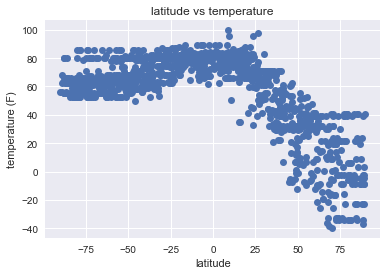

In [32]:
# Temperature vs Latitude 
plt.plot(latitudes, temperature,'o')
plt.ylabel('temperature (F)')
plt.xlabel('latitude')
plt.title('latitude vs temperature')
plt.savefig('temperature.png')
plt.show()

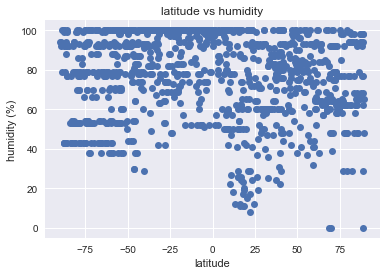

In [33]:
# Humidity vs Latitude 
plt.plot(latitudes, humidity, 'o')
plt.ylabel('humidity (%)')
plt.xlabel('latitude')
plt.title('latitude vs humidity')
plt.savefig('humidity.png')
plt.show()

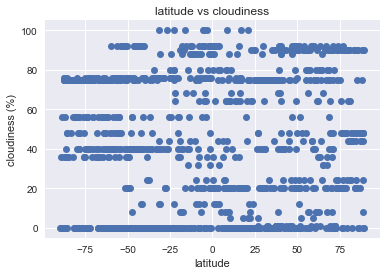

In [34]:
# Cloudiness vs Latitude 
plt.plot(latitudes, cloudiness,'o')
plt.xlabel('latitude')
plt.ylabel('cloudiness (%)')
plt.title('latitude vs cloudiness')
plt.savefig('cloudiness.png')
plt.show()

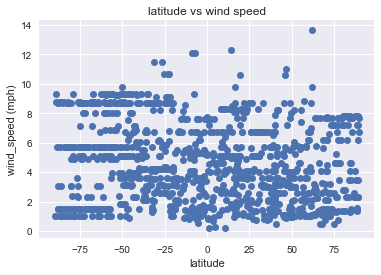

In [35]:
# Wind speed vs Latitude 
plt.plot(latitudes,wind_speed,'o')
plt.xlabel('latitude')
plt.ylabel('wind_speed (mph)')
plt.title('latitude vs wind speed')
plt.savefig('wind_speed.png')
plt.show()

### Observable trends
#### 1) temperatures overall decrease as latitude increases
#### 2) minimum humidity is achieved around a latitude of 0 
#### 3) cloudiness is overall independent of latitude (no overall trends) 